# .fif文件的读取与写入
Raw对象主要用来存储连续型数据，核心数据为n_channels和times,也包含Info对象。

In [3]:
import mne
from mne.datasets import sample
import matplotlib.pyplot as plt

# 导入示例数据
data_root = sample.data_path()
file_path = str(data_root)+"/MEG/sample/sample_audvis_raw.fif"
raw = mne.io.read_raw_fif(file_path)

Opening raw data file C:\Users\mrrai\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [15]:
print(raw)
print(raw.info)

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.3 MB, data not loaded>
<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>


## 1. 访问 raw 中的数据
`data, times = raw[picks, time_slice]`  
`data, times = raw[:]` or `data, times = raw[:, :]`  
通过[]操作符访问raw的数据, 返回一个data数组 和 一个times序列  
例如，获取10-20秒内的良好的EEG数据的代码片段如下:  

In [33]:
picks = mne.pick_types(raw.info, eeg=True, exclude='bads')  
t_idx = raw.time_as_index([10., 20.])  
data, times = raw[picks, t_idx[0]:t_idx[1]]
picks, type(picks) # array of int: Indices of good channels.

(array([315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
        328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
        341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
        354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
        368, 369, 370, 371, 372, 373, 374]),
 numpy.ndarray)

In [27]:
data.shape, times.shape  # 59个通道, 6006个时间戳

((59, 6006), (6006,))

In [28]:
data[0], data[0].shape   # 查看第0个通道, 数据有正有负, 数量级在uV

(array([-6.38092051e-06, -7.86773694e-06, -3.09753423e-06, ...,
         7.92968763e-06,  3.22143560e-06, -5.82336435e-06]),
 (6006,))

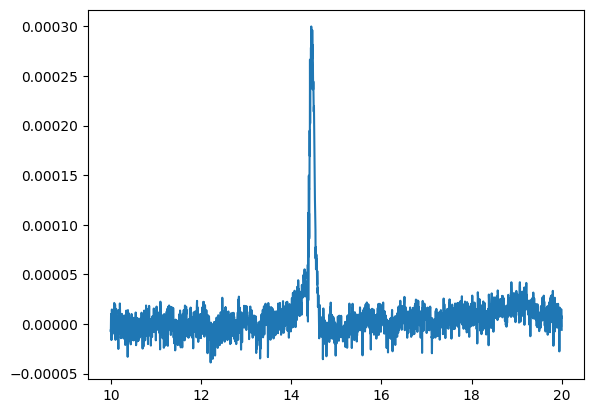

In [29]:
eegch0 = data[0]
plt.plot(times, eegch0)
plt.show()  # 绘制EEG的0通道的数据

## 2. 内置的绘图方法

Effective window size : 0.426 (s)


D:\User\mrrai\.conda\envs\MNEenv\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


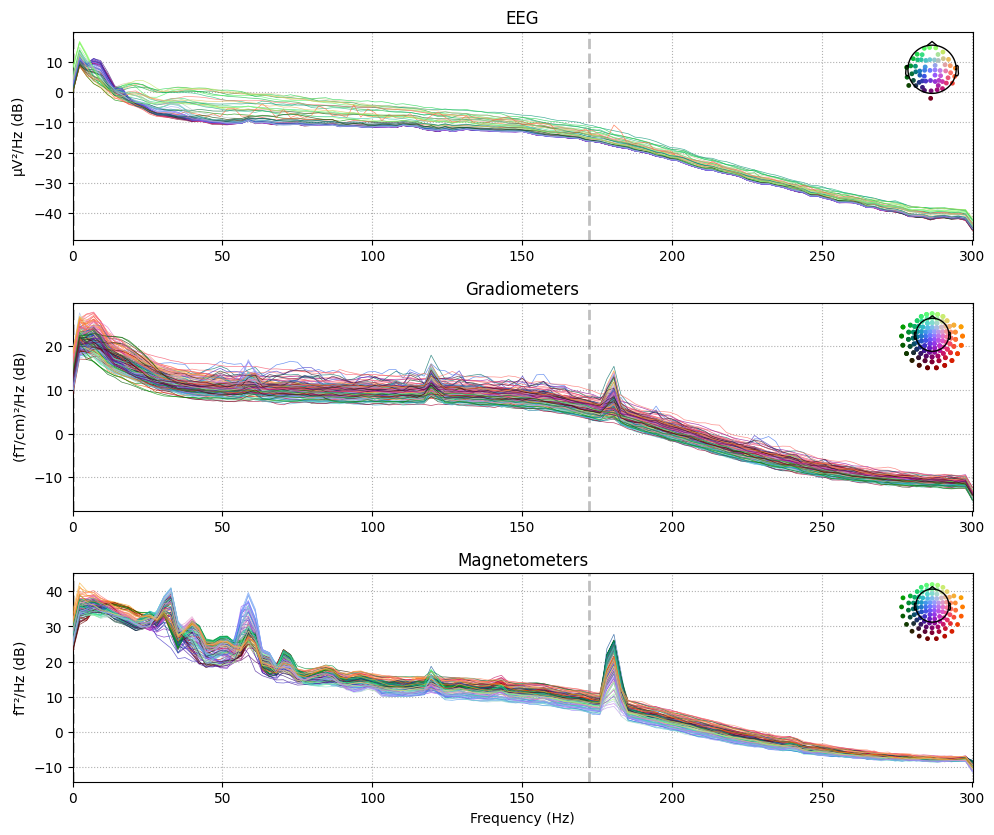

In [31]:
# 1. the power spectral density (PSD) 功率谱密度
raw.compute_psd().plot()  # 如何画指定通道的功率谱密度
plt.show()

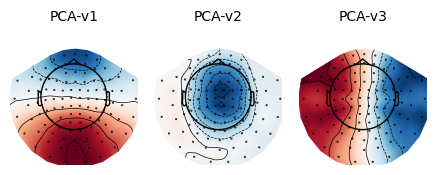

In [36]:
"""
绘制信号空间投影SSP矢量图
"""
raw.plot_projs_topomap()
plt.show()

Effective window size : 0.426 (s)


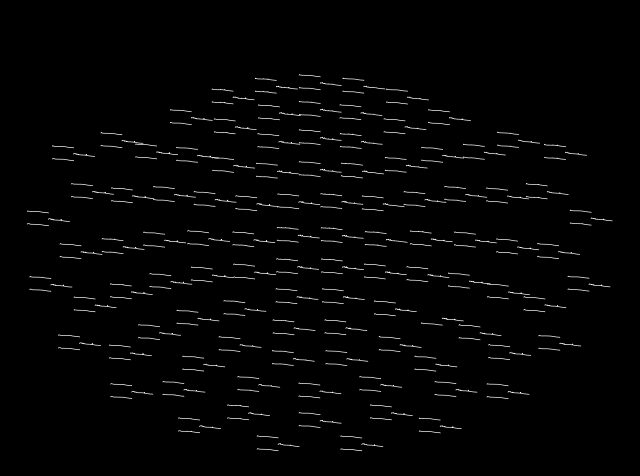

In [38]:
"""
绘制通道频谱图作为topography
"""
raw.compute_psd().plot_topo()
plt.show()


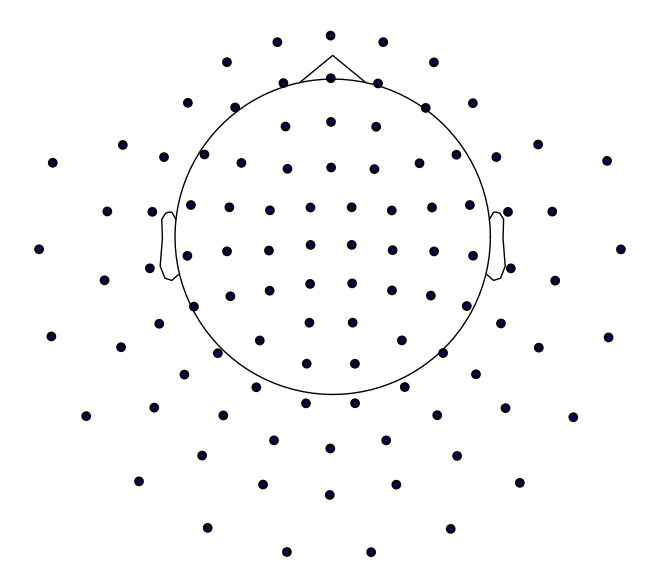

In [39]:
"""
绘制电极位置
"""
raw.plot_sensors()
plt.show()

# 向 `Raw` 数据结构写入文件
在实际过程中，有时需要从头构建数据来创建`Raw`对象。
方式：通过`mne.io.RawArray`类来手动创建`Raw`
注：使用`mne.io.RawArray`创建`Raw`对象时，其构造函数只接受矩阵和`info`对象。
构建一个`Raw`对象时，需要准备两种数据，一种是`data`数据，一种是`Info`数据，
`data`数据是一个二维数据，形状为`(n_channels,n_times)`

In [41]:
import numpy as np
data = np.random.randn(5, 1000)
info = mne.create_info(
    ch_names=['MEG1', 'MEG2', 'EEG1', 'EEG2', 'EOG'],
    ch_types=['grad', 'grad', 'eeg', 'eeg', 'eog'],
    sfreq=100
)
custom_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=5, n_times=1000
    Range : 0 ... 999 =      0.000 ...     9.990 secs
Ready.


In [44]:
custom_raw

<RawArray | 5 x 1000 (10.0 s), ~49 kB, data loaded>

Using matplotlib as 2D backend.


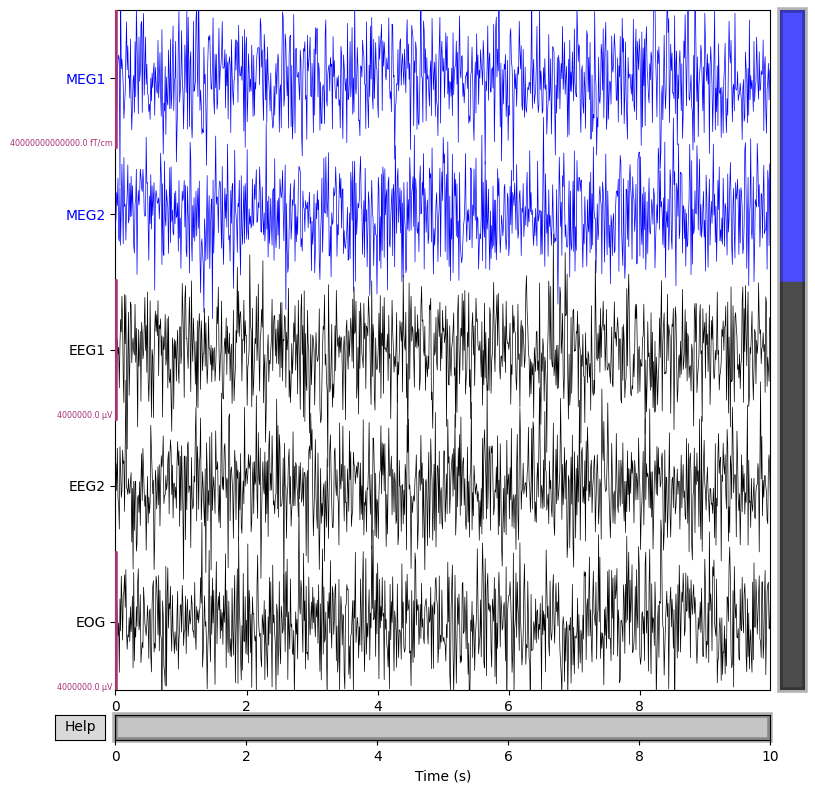

In [45]:
# 绘制图形
# 对于实际的EEG / MEG数据，应使用不同的缩放因子。
scalings = {'eeg': 2, 'grad': 2,'eog':2}
custom_raw.plot(n_channels=5, 
                scalings=scalings,
                title='Data from arrays',
         show=True, block=True)
plt.show()

Creating RawArray with float64 data, n_channels=4, n_times=10000
    Range : 0 ... 9999 =      0.000 ...     9.999 secs
Ready.


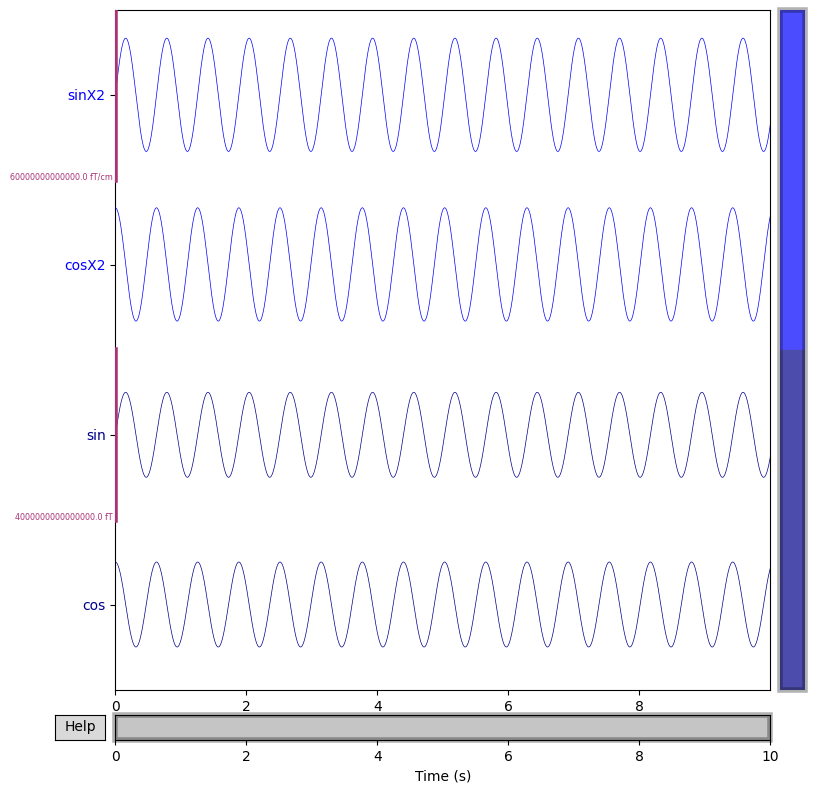

In [48]:
## 案例2
# 创建任意数据
sfreq = 1000  # 采样频率
times = np.arange(0, 10, 0.001)  # Use 10000 samples (10s)

sin = np.sin(times * 10)  # 乘以 10 缩短周期
cos = np.cos(times * 10)
sinX2 = sin * 2
cosX2 = cos * 2

# 数组大小为 4 X 10000.
data = np.array([sin, cos, sinX2, cosX2])

# 定义 channel types and names.
ch_types = ['mag', 'mag', 'grad', 'grad']
ch_names = ['sin', 'cos', 'sinX2', 'cosX2']

# 创建info对象
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data, info)

# 对通道mag的数据进行2倍缩小，对grad的数据进行1.7倍缩小
scalings = {'mag': 2, 'grad':3}
raw.plot(n_channels=4, scalings=scalings, title='Data from arrays',
         show=True, block=True)
plt.show()